# clusterCleaver Tutorial

Before beginning, download the gene list used for our paper and a toy anndata object from https://zenodo.org/records/12628304

## Introduction
clusterCleaver is a computational tool for analyzing gene expression data and predicting the best surface markers that can distinguish these clusters. 

We'll be working with a dataset of MDA-MB-231 cells. These are untreated cells that are less than 5 passages. 

In [1]:
import scanpy as sc
import pandas as pd

from clusterCleaver import searchOptimal, visualization


First let's load and visualize our data. 

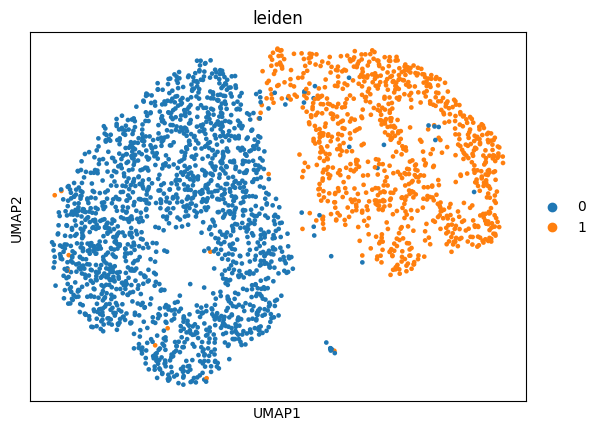

In [2]:
adata = sc.read_h5ad('./data/adata231Process.h5ad')
surfaceGenes = pd.read_csv('./data/surfaceGenes.csv', skiprows=4)
surfaceGenes = surfaceGenes['Column2'].tolist()

sc.pl.umap(adata, color = 'leiden')

This dataset has 2 leiden clusters. From the UMAP above, we can see that these are clearly two distinct clusters, despite coming from a single cell line.

In [3]:
topGenes = searchOptimal.searchExpressionDist1D(adata, 
                                                surfaceGenes, 
                                                label = 'leiden')

Searching for 3443 combinations of 1 gene(s)


100%|██████████| 3443/3443 [00:14<00:00, 238.13it/s]


Across over 3000 genes, our search only took ~15 seconds. Here are the top hits:

In [4]:
topGenes.head(10)

,genes,scores,cluster
371,TSPAN8,1.181627,1
182,SLCO4A1,1.151065,1
344,HLA-DRB1,1.133970,1
343,THBS1,1.105591,0
280,ESAM,1.042409,1
1863,RASD1,1.034692,1
511,HLA-DRA,0.976328,1
1124,MAL2,0.953861,1
1151,EPHB6,0.946654,1
589,SLCO1B3,0.935565,1


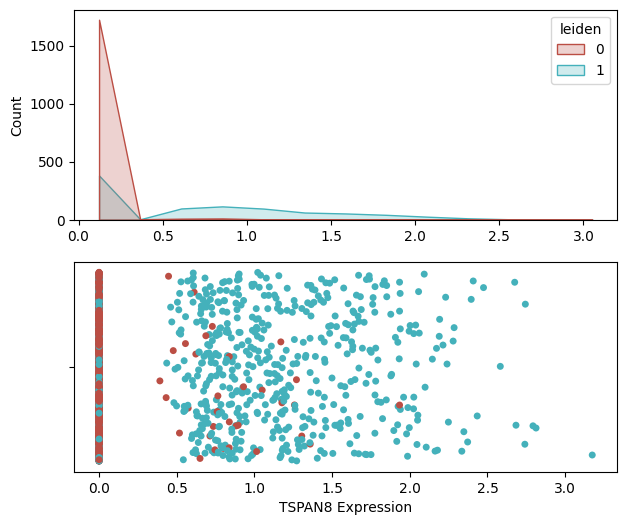

In [8]:
visualization.plotHists(adata, 'TSPAN8')

As we can see, TSPAN8 had the best Earth Mover's Distance (EMD) score. We also confirmed this separation is valid using both a histogram and stripplot, which reveal good levels of separation. If this gene encodes a surface protein (as predicted), this would be an effective way to isolate clusters 0 and 1. 

In [9]:
topGenes.tail()

,genes,scores,cluster
1483,SLC22A14,0.000122,0
345,SMO,0.000107,0
1214,OR11G2,0.000103,0
630,PCDHB4,0.000089,1
1793,ADAM21,0.000082,1


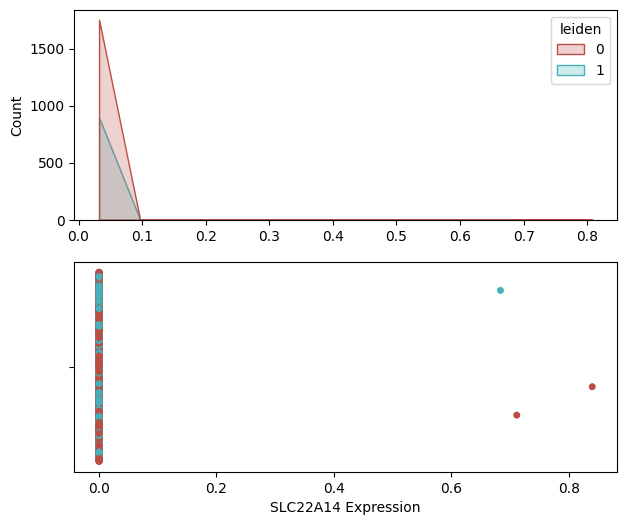

In [11]:
visualization.plotHists(adata, 'SLC22A14')

In contrast, a gene with low EMD has a lot of overlap between clusters. 